<a href="https://colab.research.google.com/github/JoshFowlkes/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment_Josh_Fowlkes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [112]:
# making dataframe
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
df = pd.DataFrame(sales)
df.columns = ['sales']

# getting mean
mean = sum(sales)/len(sales)
print('Mean:', mean)
print('Mean by Numpy:', np.mean(sales))

# getting distnaces
df['distance'] = (df['sales']-mean)

# squaring distances
df['squared distance'] = (df['distance']**2)

#getting variance
observations = len(df['sales'])
variance = df['squared distance'].sum()/observations
print('Variance : ', variance)
print('Variance by Numpy: ', np.var(sales))

# standard deviation
squared_distance_mean = df['squared distance'].sum()/(len(df['squared distance']-1))
standard_dev = (squared_distance_mean)**(.5)
print('Standard Deviation:', standard_dev)

print('Standard Deviation by Numpy:', np.std(sales))



Mean: 3052.714285714286
Mean by Numpy: 3052.714285714286
Variance :  183761.06122448976
Variance by Numpy:  183761.06122448976
Standard Deviation: 428.67360686714756
Standard Deviation by Numpy: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [110]:

df = df.drop(df.columns[[1,2]], axis=1)
df.head()

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]
df['customers'] = [127, 80, 105, 92, 120, 115, 93]

In [111]:
df['customers'] = [127, 80, 105, 92, 120, 115, 93]
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [121]:
# mean of customers
new_mean = sum(customers)/len(customers)

# getting distnaces
df['customer distance'] = (df['customers']-new_mean)

# squaring distances
df['squared customer distance'] = (df['customer distance']**2)

#getting variance
observations = len(customers)
variance = df['squared customer distance'].sum()/observations
print('Variance : ', variance)
print('Variance Numpy:', np.var(customers))

# standard deviation
squared_distance_mean = df['squared customer distance'].sum()/(len(df['squared customer distance']-1))
new_standard_dev = (squared_distance_mean)**(.5)
print('Standard Deviation:', new_standard_dev)
print('Standard Deviation Numpy:', np.std(customers))


df.head()

Variance :  249.3877551020408
Variance Numpy: 249.3877551020408
Standard Deviation: 15.792015549069118
Standard Deviation Numpy: 15.792015549069118


,sales,distance,squared distance,customers,customer distance,squared customer distance
0,3505,452.285714,204562.367347,127,22.428571,503.040816
1,2400,-652.714286,426035.938776,80,-24.571429,603.755102
2,3027,-25.714286,661.224490,105,0.428571,0.183673
3,2798,-254.714286,64879.367347,92,-12.571429,158.040816
4,3700,647.285714,418978.795918,120,15.428571,238.040816


In [116]:
df.cov()

,sales,distance,squared distance,customers,customer distance,squared customer distance
sales,2.143879e+05,2.143879e+05,4.776800e+06,7604.357143,7604.357143,4.776800e+06
distance,2.143879e+05,2.143879e+05,4.776800e+06,7604.357143,7604.357143,4.776800e+06
squared distance,4.776800e+06,4.776800e+06,3.095725e+10,-226038.914966,-226038.914966,3.095725e+10
customers,7.604357e+03,7.604357e+03,-2.260389e+05,290.952381,290.952381,-2.260389e+05
customer distance,7.604357e+03,7.604357e+03,-2.260389e+05,290.952381,290.952381,-2.260389e+05
squared customer distance,4.776800e+06,4.776800e+06,3.095725e+10,-226038.914966,-226038.914966,3.095725e+10


In [126]:
# correlation Coefficient 

r1 = np.cov(sales)/(standard_dev * new_standard_dev)
r2 = np.cov(customers)/(standard_dev * new_standard_dev)
print('Correlation Coefficient Sales:', r1)
print('Correlation Coefficient Customers:', r2)
print('Correlation Coefficient Numpy\n', np.corrcoef(sales, customers))

Correlation Coefficient Sales: 859.6569012547735
Correlation Coefficient Customers: 1.1666666666666667
Correlation Coefficient Numpy
 [[1.         0.96283398]
 [0.96283398 1.        ]]


In [117]:
df.corr()

,sales,distance,squared distance,customers,customer distance,squared customer distance
sales,1.000000,1.000000,0.058635,0.962834,0.962834,0.058635
distance,1.000000,1.000000,0.058635,0.962834,0.962834,0.058635
squared distance,0.058635,0.058635,1.000000,-0.075317,-0.075317,1.000000
customers,0.962834,0.962834,-0.075317,1.000000,1.000000,-0.075317
customer distance,0.962834,0.962834,-0.075317,1.000000,1.000000,-0.075317
squared customer distance,0.058635,0.058635,1.000000,-0.075317,-0.075317,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [128]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [130]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [129]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Dot Product:  0


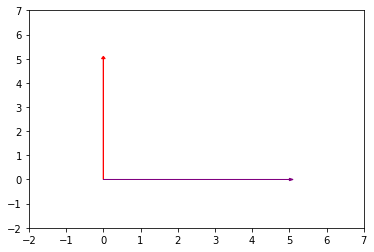

In [149]:
vector_one = [0,5]
vector_two = [5,0]

plt.arrow(0,0, vector_one[0], vector_one[1], head_width=.1, head_length=.1, color = 'red')
plt.arrow(0,0, vector_two[0], vector_two[1], head_width=.1, head_length=.1, color = 'purple')
plt.xlim(-2,7)
plt.ylim(-2,7)

print('Dot Product: ', np.dot(vector_one, vector_two))

Synonym For Orthogonal = Perpendicular. 

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

-40

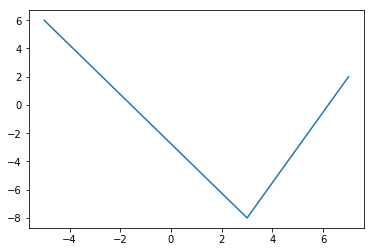

In [151]:
a = [-5, 3, 7]
b = [6, -8, 2]

plt.plot(a,b)

dot = np.dot(a,b)
dot

Since the dot product of the two is NOT 0 then we can conclude that they are not orthognal(perpendicular).

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [165]:
c = np.array([2, -15, 6, 20])
c_squared = np.power(c, 2)

c_norm = sum(c_squared)
print('norm of c:', c_norm)
print('squared norm of c: ', c_norm**2)

cc = np.matmul(c,c)
print('cxc:', cc )


c_transpose = c.T
c_transpose_c = c_transpose*c
print('c transpose c',c_transpose_c)

norm of c: 665
squared norm of c:  442225
cxc: 665
c transpose c [  4 225  36 400]


For starts, the norm^2 is equivalent to the product of the same matrices. And then the Transpose of C multiplied by C is equivalent to c Squared. Makes sense due to the transpose. 

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

**Answers IN the nice format:**
 
 \begin{align}
 d =  7\begin{bmatrix} 1 \\ 0 \end{bmatrix}  + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}


\begin{align}
e =  2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [179]:
f = [4, 12, 11, 9 ,2]

f_norm = (sum(np.power(f, 2))**(.5))
print(f_norm)
print('checking norm with np', np.linalg.norm(f))

f_unitv = np.multiply(f, (1/f_norm))
print('f as a Unit vector:', f_unitv)

19.131126469708992
checking norm with np 19.131126469708992
f as a Unit vector: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

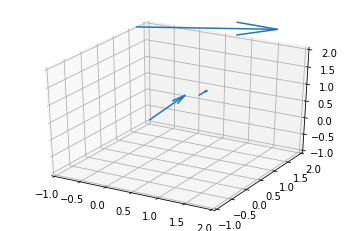

In [185]:
from mpl_toolkits.mplot3d import Axes3D

vectors = np.array([[.1, .2, .3, .4, .5, .6], [.7, .8, .9, .10, .11, .12],
                [0, 0, 3, 2, 1, 0], [0, 0, 4, 0.5, 0.7, 0]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
ax.set_zlim([-1, 2])
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

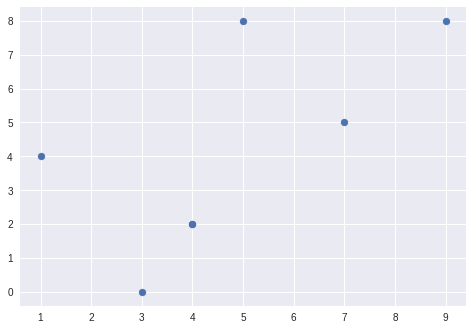

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()